In [63]:
# Importando as bibliotecas
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix ,precision_score, recall_score, f1_score, classification_report ,roc_curve, roc_auc_score ,roc_curve, auc, ConfusionMatrixDisplay , RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

  
import matplotlib.pyplot as plt
import xgboost as xgb    
from utils.metrics import *
from sklearn.utils import resample
import seaborn as sns

%matplotlib inline



# Global Variables
credit_aproval = pd.read_excel('treino.xlsx',index_col=[0])
validation_credit_aproval  = pd.read_excel("teste.xlsx",index_col=[0])

X = credit_aproval.drop("Class", axis = 1)
y = credit_aproval["Class"]


SPLIT = 0.7

SEED=42

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


----

# EDA

In [3]:
credit_aproval.head() # as variaveis ja sao componentes principais


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,Class
id,,,,,,,,,,,,,,,,,,,,,
1,-0.299468,0.533339,0.592928,0.094916,0.015414,0.019142,0.045814,0.177430,-0.040845,-0.201868,...,-0.006907,0.082039,0.783691,0.046401,-0.181900,0.201659,0.186339,0.052175,0.081669,0
2,0.529493,-0.094837,0.341711,0.568313,-0.318345,0.201856,-0.302414,0.208240,0.290601,-0.005605,...,-0.934574,0.248362,0.231307,-0.121390,0.045858,-0.088862,-0.320489,-0.132945,0.051778,0
3,0.605630,-0.024632,-0.042535,-0.023267,-0.135464,-0.141456,0.093773,-0.093751,-0.586908,0.282549,...,0.681119,-0.082467,-0.037362,-0.923501,0.024895,0.135814,-0.367899,-0.084424,-0.273891,0
4,-0.346173,0.647783,0.473604,-0.165712,0.127780,-0.221239,0.295904,0.076857,-0.220782,-0.110628,...,0.560604,0.001884,0.409169,0.236170,-0.362497,-0.085438,0.210089,0.112295,-0.136954,0
5,0.240050,-0.688908,0.525568,0.434648,-0.371745,0.799044,-0.332958,0.227423,0.783561,-0.423634,...,0.561863,-0.483898,0.041915,-0.616440,0.548586,-0.956886,-0.379454,0.235959,0.035924,0


In [4]:
credit_aproval.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,Class
id,,,,,,,,,,,,,,,,,,,,,
164227,0.945540,-0.636454,-1.891954,-0.694469,1.006394,1.333040,0.075870,0.200967,-0.551412,0.429079,...,-0.062475,0.457187,-0.036584,-1.154964,-0.020712,0.595263,-0.140924,-0.097852,-0.090685,0
164228,0.069862,0.474324,-1.456827,-1.092415,0.941858,-0.528412,0.862812,0.009045,-0.411747,-0.128967,...,-0.035620,0.655400,-0.946454,-0.159390,-0.458698,0.049198,-0.097779,-0.058269,0.245734,0
164229,1.029171,-0.019496,-0.964276,0.165058,0.135064,-0.367832,-0.086939,0.072412,0.424644,-0.068249,...,-1.968847,0.015673,0.014050,0.441783,0.195901,0.503895,0.151688,-0.192415,-0.153320,0
164230,1.039613,-1.081195,-0.892917,-1.402444,0.276423,2.019006,-1.077950,0.511892,-0.432621,0.768096,...,-0.127359,-0.212865,0.332778,-0.168317,0.150983,0.195624,0.018885,-0.095492,0.054955,0
164231,-0.215879,0.649585,-0.285801,-0.580750,0.570882,-0.629435,0.850776,-0.227290,-0.278489,-0.024727,...,0.361352,0.262834,-0.463130,-0.189906,-0.320088,-0.080870,0.017235,0.029066,0.112815,0


In [5]:
credit_aproval.shape

(164231, 22)

In [6]:
credit_aproval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164231 entries, 1 to 164231
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      164231 non-null  float64
 1   V2      164231 non-null  float64
 2   V3      164231 non-null  float64
 3   V4      164231 non-null  float64
 4   V5      164231 non-null  float64
 5   V6      164231 non-null  float64
 6   V7      164231 non-null  float64
 7   V8      164231 non-null  float64
 8   V9      164231 non-null  float64
 9   V10     164231 non-null  float64
 10  V11     164231 non-null  float64
 11  V12     164231 non-null  float64
 12  V13     164231 non-null  float64
 13  V14     164231 non-null  float64
 14  V15     164231 non-null  float64
 15  V16     164231 non-null  float64
 16  V17     164231 non-null  float64
 17  V18     164231 non-null  float64
 18  V19     164231 non-null  float64
 19  V20     164231 non-null  float64
 20  V21     164231 non-null  float64
 21  Class   16

In [7]:
credit_aproval.isna().any()

V1       False
V2       False
V3       False
V4       False
V5       False
V6       False
V7       False
V8       False
V9       False
V10      False
V11      False
V12      False
V13      False
V14      False
V15      False
V16      False
V17      False
V18      False
V19      False
V20      False
V21      False
Class    False
dtype: bool

In [8]:
print(credit_aproval.describe())

                  V1             V2             V3             V4  \
count  164231.000000  164231.000000  164231.000000  164231.000000   
mean        0.020816       0.029036       0.274890       0.023903   
std         0.709996       0.592437       0.580047       0.631710   
min       -14.903862     -19.758520      -9.861436      -2.631825   
25%        -0.445887      -0.296836      -0.048311      -0.398327   
50%        -0.026290       0.023532       0.359776       0.018997   
75%         0.590285       0.422750       0.651813       0.456228   
max         1.215247       8.034236       3.072789       6.134471   

                  V5             V6             V7             V8  \
count  164231.000000  164231.000000  164231.000000  164231.000000   
mean       -0.063158       0.087255      -0.061199       0.081759   
std         0.547314       0.615860       0.414050       0.371658   
min       -18.795629      -8.178917     -10.938095     -14.285038   
25%        -0.422133      -0.3112

<AxesSubplot:>

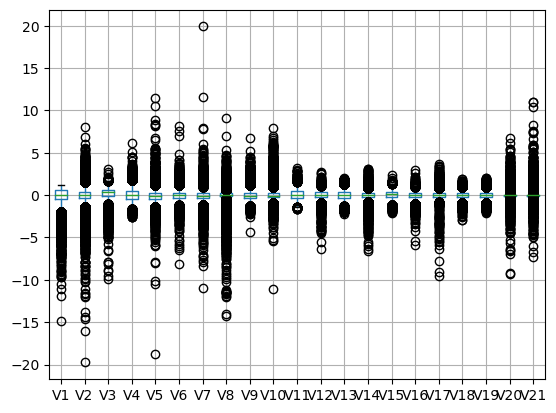

In [9]:
credit_aproval.iloc[:,:-1].boxplot() # muitos outliers

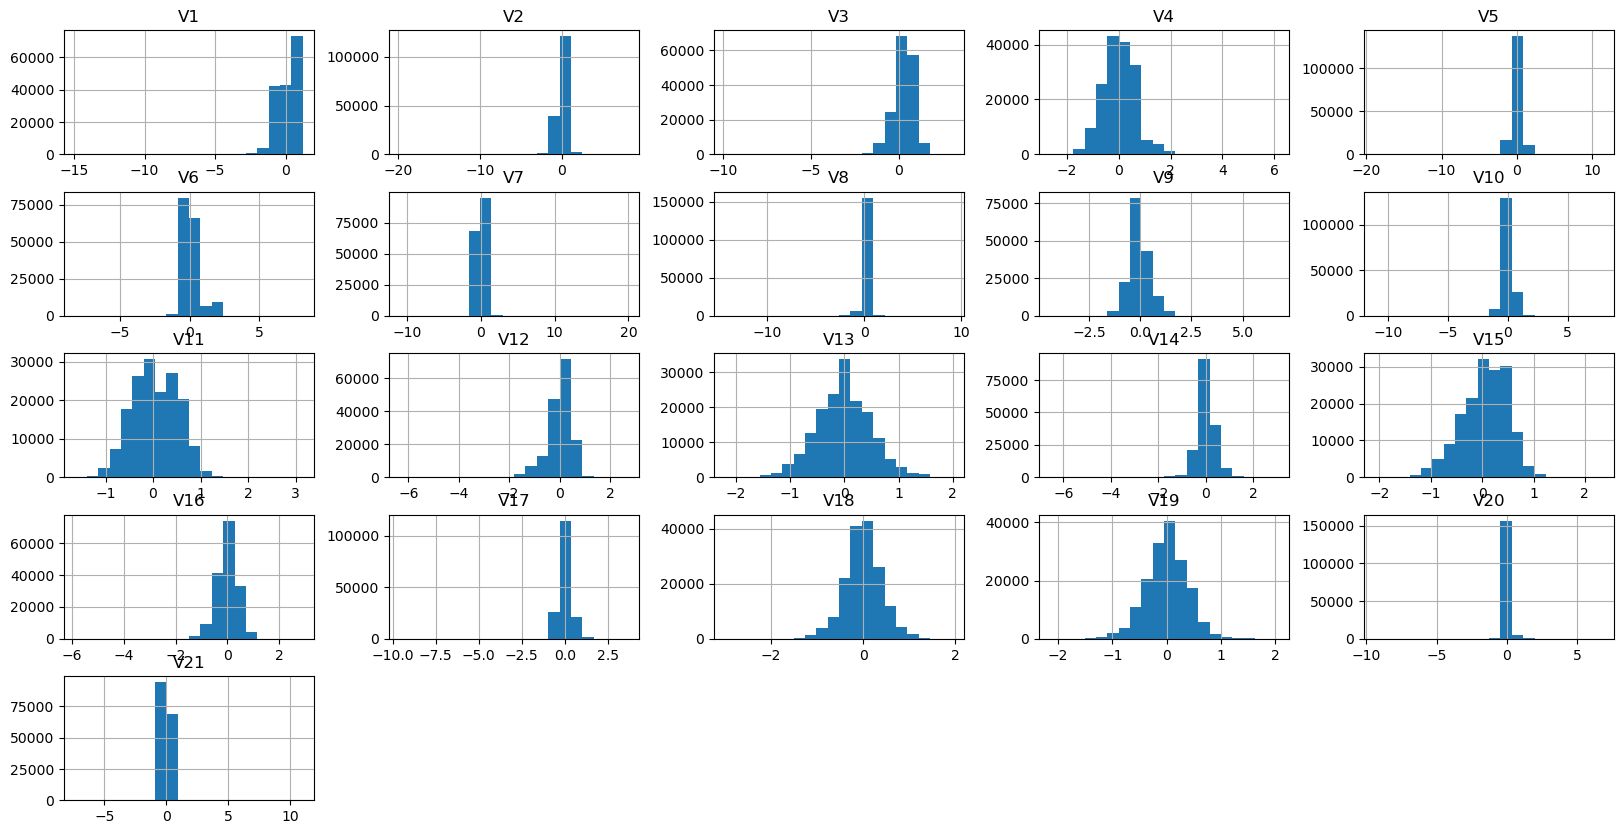

In [10]:
credit_aproval.drop("Class",axis=1).hist(bins=20)
plt.gcf().set_size_inches(20, 10)

In [11]:
credit_aproval['Class'].value_counts()/  credit_aproval.shape[0]

0    0.997851
1    0.002149
Name: Class, dtype: float64

In [12]:

from scipy import stats


for col in credit_aproval.drop("Class",axis=1):
    print("#" *100)
    print(col)
    x = credit_aproval[col].values
    y = credit_aproval['Class'].values

    # Calculate the Point-Biserial Correlation Coefficient
    pb_coeff, p_value = stats.pointbiserialr(x, y)

    print(f"Point-Biserial Correlation Coefficient: {pb_coeff:.4f}")
    print(f"p-value: {p_value:.4f}")


####################################################################################################
V1
Point-Biserial Correlation Coefficient: -0.0364
p-value: 0.0000
####################################################################################################
V2
Point-Biserial Correlation Coefficient: 0.0120
p-value: 0.0000
####################################################################################################
V3
Point-Biserial Correlation Coefficient: -0.0541
p-value: 0.0000
####################################################################################################
V4
Point-Biserial Correlation Coefficient: 0.0283
p-value: 0.0000
####################################################################################################
V5
Point-Biserial Correlation Coefficient: 0.0090
p-value: 0.0003
####################################################################################################
V6
Point-Biserial Correlation Coefficient: -0.0068
p-value: 0.

<AxesSubplot:>

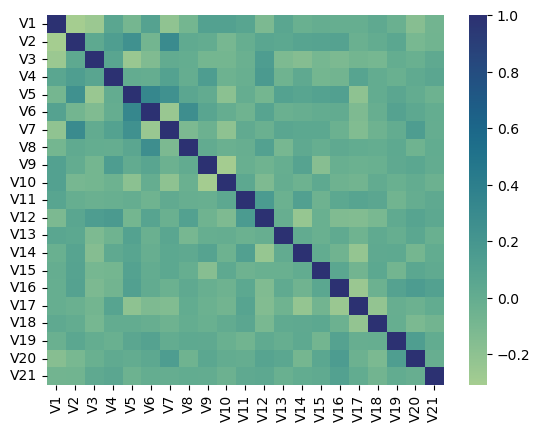

In [13]:
sns.heatmap(credit_aproval.iloc[:,:-1].corr(),cmap="crest") # variaveis sao pouco correlacionadas  entre si

<AxesSubplot:>

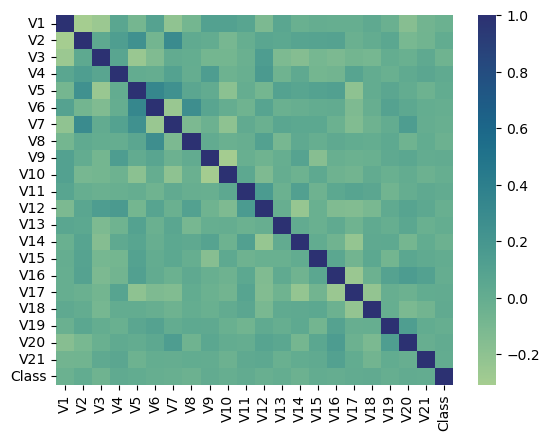

In [14]:
sns.heatmap(credit_aproval.corr(),cmap="crest") # variaveis sao pouco correlacionadas 

In [15]:
credit_aproval

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,Class
id,,,,,,,,,,,,,,,,,,,,,
1,-0.299468,0.533339,0.592928,0.094916,0.015414,0.019142,0.045814,0.177430,-0.040845,-0.201868,...,-0.006907,0.082039,0.783691,0.046401,-0.181900,0.201659,0.186339,0.052175,0.081669,0
2,0.529493,-0.094837,0.341711,0.568313,-0.318345,0.201856,-0.302414,0.208240,0.290601,-0.005605,...,-0.934574,0.248362,0.231307,-0.121390,0.045858,-0.088862,-0.320489,-0.132945,0.051778,0
3,0.605630,-0.024632,-0.042535,-0.023267,-0.135464,-0.141456,0.093773,-0.093751,-0.586908,0.282549,...,0.681119,-0.082467,-0.037362,-0.923501,0.024895,0.135814,-0.367899,-0.084424,-0.273891,0
4,-0.346173,0.647783,0.473604,-0.165712,0.127780,-0.221239,0.295904,0.076857,-0.220782,-0.110628,...,0.560604,0.001884,0.409169,0.236170,-0.362497,-0.085438,0.210089,0.112295,-0.136954,0
5,0.240050,-0.688908,0.525568,0.434648,-0.371745,0.799044,-0.332958,0.227423,0.783561,-0.423634,...,0.561863,-0.483898,0.041915,-0.616440,0.548586,-0.956886,-0.379454,0.235959,0.035924,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164227,0.945540,-0.636454,-1.891954,-0.694469,1.006394,1.333040,0.075870,0.200967,-0.551412,0.429079,...,-0.062475,0.457187,-0.036584,-1.154964,-0.020712,0.595263,-0.140924,-0.097852,-0.090685,0
164228,0.069862,0.474324,-1.456827,-1.092415,0.941858,-0.528412,0.862812,0.009045,-0.411747,-0.128967,...,-0.035620,0.655400,-0.946454,-0.159390,-0.458698,0.049198,-0.097779,-0.058269,0.245734,0
164229,1.029171,-0.019496,-0.964276,0.165058,0.135064,-0.367832,-0.086939,0.072412,0.424644,-0.068249,...,-1.968847,0.015673,0.014050,0.441783,0.195901,0.503895,0.151688,-0.192415,-0.153320,0


/tmp/ipykernel_16482/3951964742.py:25: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


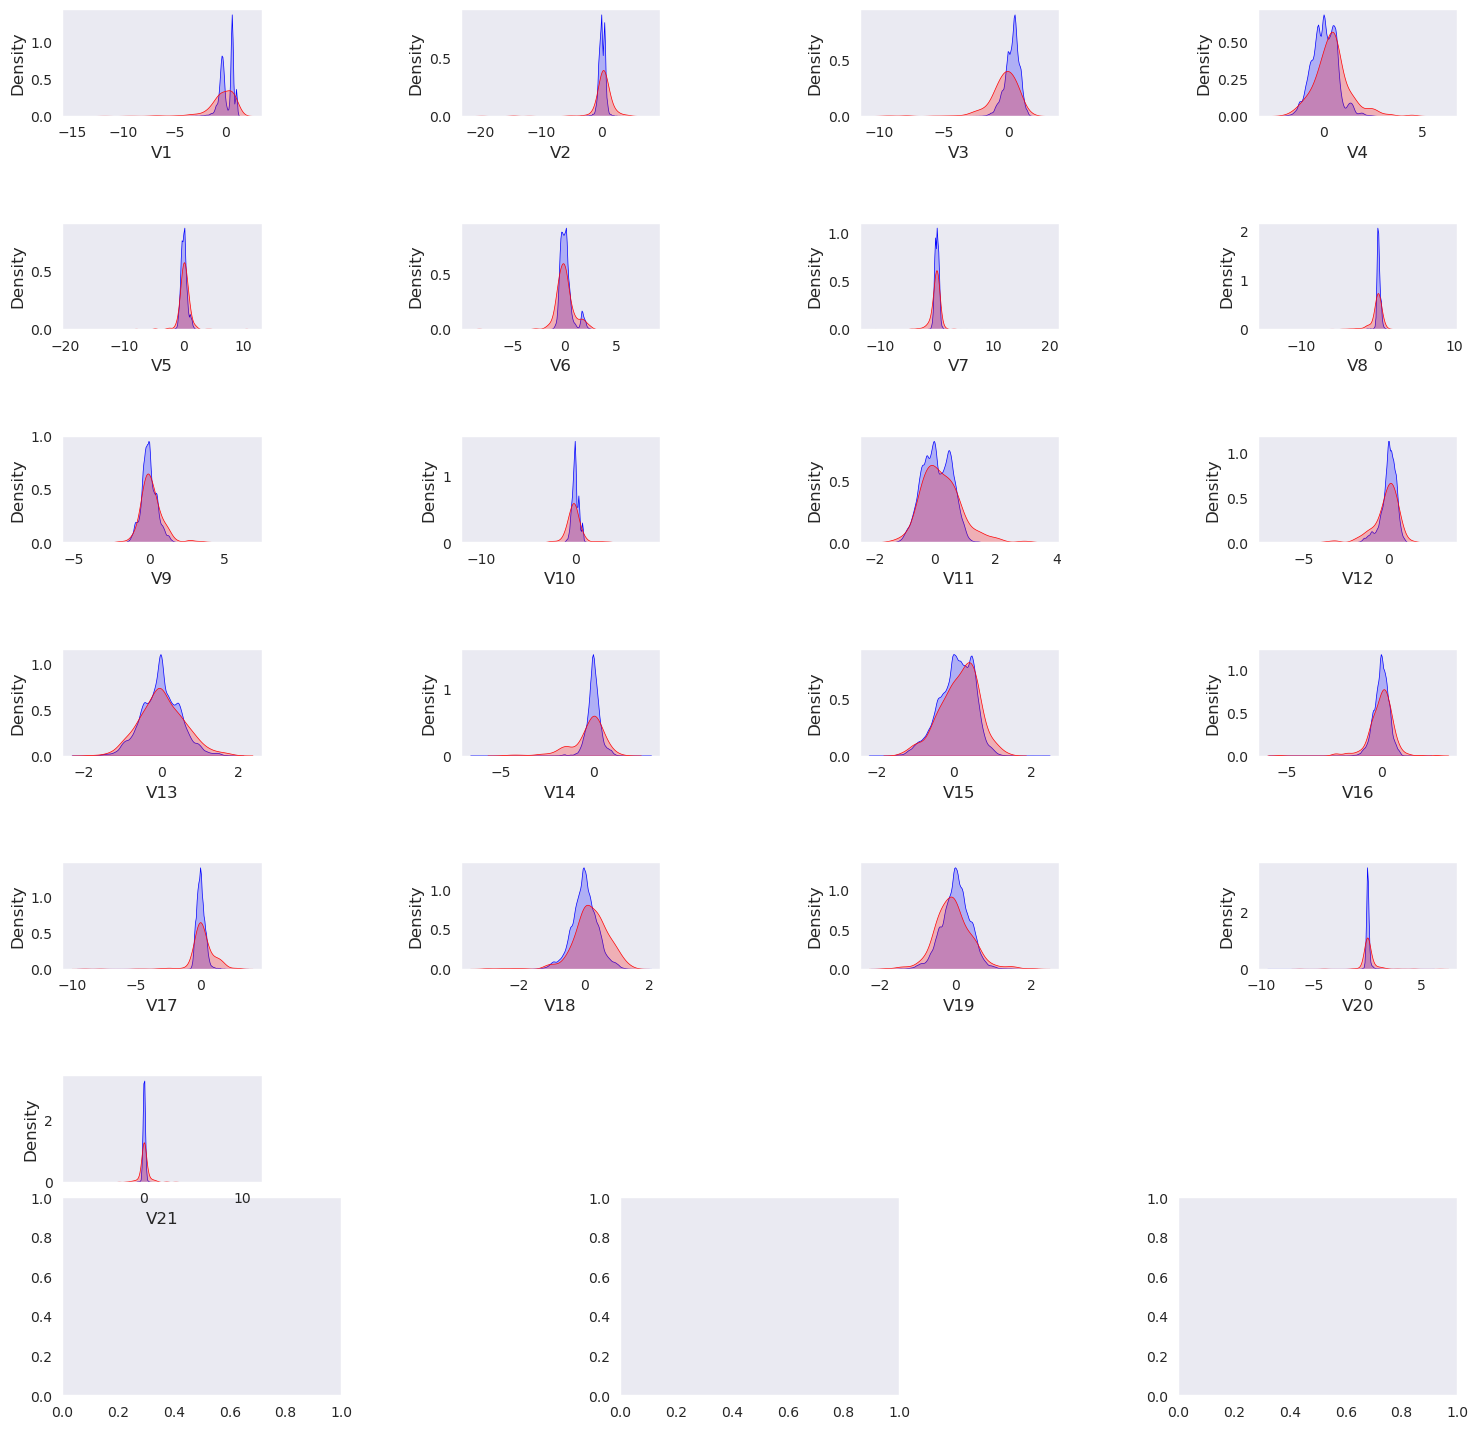

In [60]:
# configurações adicionais
plt.style.use('ggplot')
sns.set_style('dark')

# plotar gráfico de densidade
## criar variável com as colunas PCA (V1, V2, V3, ..., V28)
pca_columns = credit_aproval.drop(['Class'], axis=1).columns

## segmentar transações legítimas e fraudulentas
class_0 = credit_aproval[credit_aproval.Class == 0]
class_1 = credit_aproval[credit_aproval.Class == 1]

# configurar gráfico
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

# loop para plotar todas as 28 variáveis
idx = 0
for col in pca_columns:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(class_0[col], shade=True, color='b')
    sns.kdeplot(class_1[col], shade=True, color='r')

plt.tight_layout()

----------

# Logistc Regression


## Grid search Logistc Regression

In [22]:


pipe_lr = make_pipeline(LogisticRegression(class_weight='balanced'))

strat_kfold = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

auc_scores = cross_val_score(estimator=pipe_lr, X=X, y=y,cv=strat_kfold,n_jobs=-1,scoring='roc_auc')


# Print the AUC scores for each fold
print('AUC scores:', auc_scores)

# Compute the mean AUC score across all folds
mean_auc = auc_scores.mean()
print('Mean AUC:', mean_auc)

AUC scores: [0.73819258 0.84887897 0.79111894 0.76563688 0.7950992  0.78288295
 0.87913107 0.82606437 0.80396215 0.80779649]
Mean AUC: 0.8038763594727202


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = SPLIT , random_state =  SEED)

strat_kfold = StratifiedKFold(n_splits=10, shuffle=False)

params_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
}

# Step 2: Perform cross-validation with hyperparameter tuning
grid_search_log_reg = GridSearchCV(LogisticRegression(class_weight='balanced',solver='liblinear',random_state = SEED), params_log_reg, cv=strat_kfold, scoring='roc_auc',n_jobs=-1)
grid_search_log_reg.fit(X_train, y_train)

best_log_reg = grid_search_log_reg.best_estimator_

best_log_reg.fit(X_train, y_train)

train_metrics = get_metrics(best_log_reg,y_train,X_train)
test_metrics = get_metrics(best_log_reg,y_test,X_test)

In [24]:
grid_search_log_reg.cv_results_['mean_test_score']

array([0.80210373, 0.81024366, 0.8135096 , 0.8117201 , 0.81216413,
       0.81200557, 0.81206057, 0.81205442, 0.81206067, 0.8120569 ,
       0.81205576, 0.81205538, 0.81205538, 0.81205576])

In [25]:
display_metrics(train_metrics,test_metrics)

Accuracy  - Train :  0.8175
Accuracy  - Test :  0.8191
----------------------------------------------------------------------------------------------------
Precision  - Train :  0.0072
Precision  - Test :  0.0088
----------------------------------------------------------------------------------------------------
Recall  - Train :  0.6667
Recall  - Test :  0.632
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  0.0143
F1-Score  - Test :  0.0174
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  0.8302
Area Under the Curve  - Test :  0.7936
----------------------------------------------------------------------------------------------------
Gini  - Train :  0.66
Gini  - Test :  0.59
----------------------------------------------------------------------------------------------------


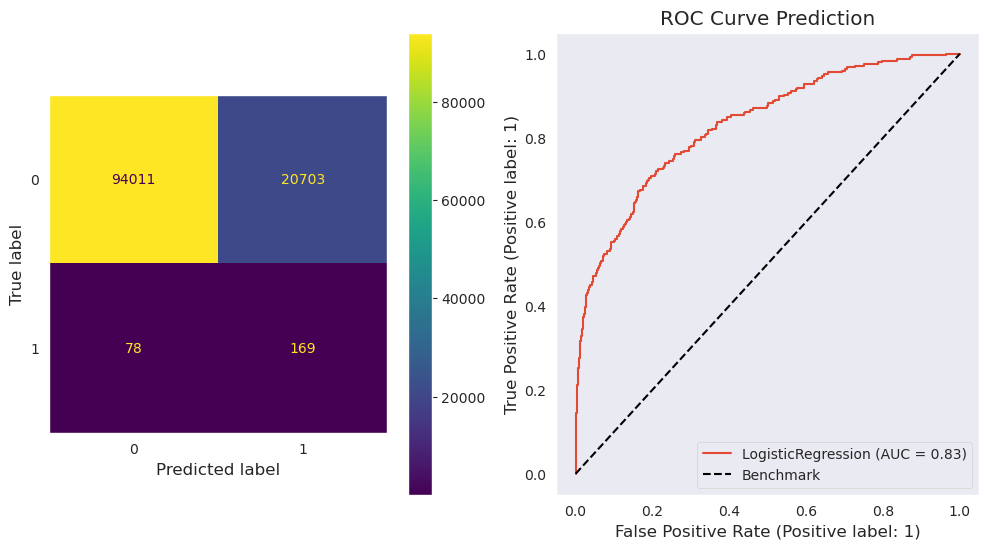

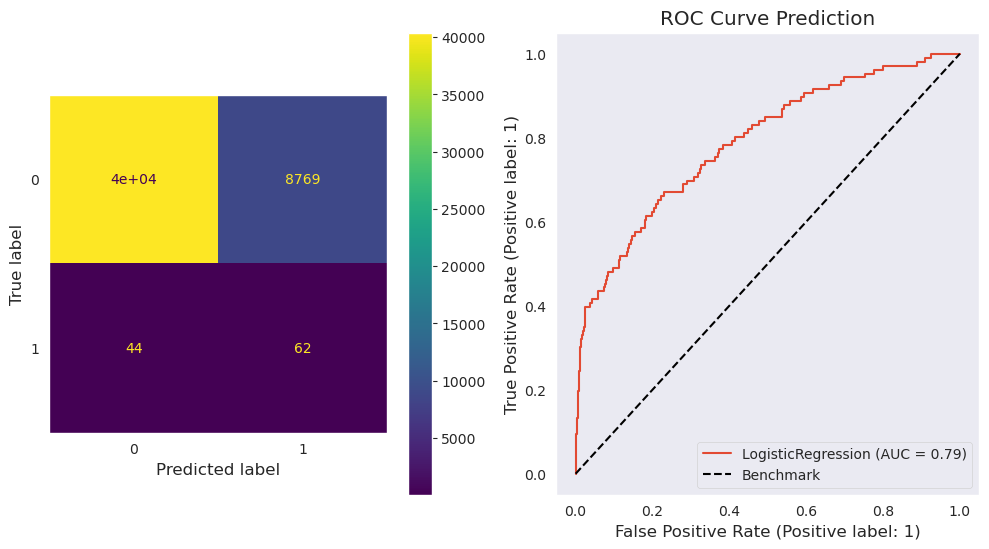

In [106]:
plot_classification_metrics(best_log_reg,y_train,X_train)
plot_classification_metrics(best_log_reg,y_test,X_test)


In [64]:
kpis_v1 = get_metrics_table(best_log_reg,y_test,X_test,model_name="grid_search_logit")
kpis_v1

,Model,Accuracy,Precision,Recall,F1-Score,Area Under the Curve,Gini
0,grid_search_logit,0.820418,0.008895,0.632,0.017544,0.809597,0.62


--------------------

## Dealing Data Proportions

* Oversampling (upsampling)

In [71]:


X_train, X_test, y_train, y_test = train_test_split(X , y, train_size = SPLIT,stratify=y ,random_state = SEED)

df_resample = pd.concat([X_train,y_train],axis=1)
df_resample.columns = credit_aproval.columns


#create two different dataframe of majority and minority class 

df_majority = df_resample[(df_resample['Class']==0)] 
df_minority = df_resample[(df_resample['Class']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=df_resample[df_resample['Class'] == 0].shape[0],# to match majority class
                                 random_state=SEED)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])



print(df_upsampled ['Class'].value_counts())

X_upsamp = df_upsampled.drop("Class", axis = 1)
y_upsamp = df_upsampled ["Class"]

1    114714
0    114714
Name: Class, dtype: int64


In [72]:




strat_kfold = StratifiedKFold(n_splits=10, shuffle=False)

params_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
}


# Step 2: Perform cross-validation with hyperparameter tuning
grid_search_log_reg_v2 = GridSearchCV(LogisticRegression(class_weight='balanced',solver='liblinear'), params_log_reg, cv=strat_kfold, scoring='roc_auc',n_jobs=-1)
grid_search_log_reg_v2.fit(X_upsamp , y_upsamp )

best_log_reg_v2 = grid_search_log_reg_v2.best_estimator_
best_log_reg_v2.fit(X_upsamp , y_upsamp )

train_metrics_v2 = get_metrics(best_log_reg_v2,y_upsamp ,X_upsamp )
test_metrics_v2 = get_metrics(best_log_reg_v2,y_test,X_test)

display_metrics(train_metrics_v2,test_metrics_v2)


Accuracy  - Train :  0.7517
Accuracy  - Test :  0.8211
----------------------------------------------------------------------------------------------------
Precision  - Train :  0.7912
Precision  - Test :  0.007
----------------------------------------------------------------------------------------------------
Recall  - Train :  0.6839
Recall  - Test :  0.5849
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  0.7336
F1-Score  - Test :  0.0139
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  0.831
Area Under the Curve  - Test :  0.7886
----------------------------------------------------------------------------------------------------
Gini  - Train :  0.66
Gini  - Test :  0.58
----------------------------------------------------------------------------------------------------


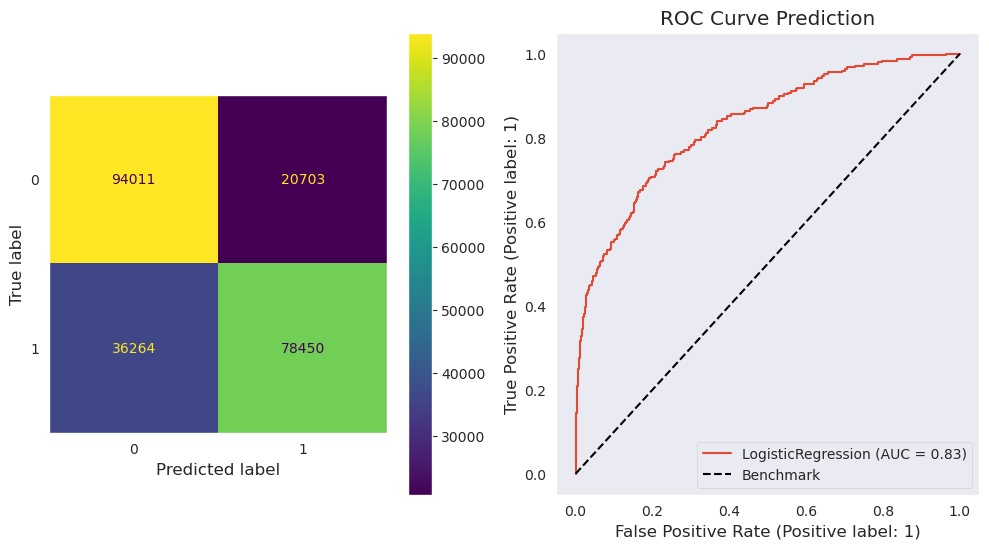

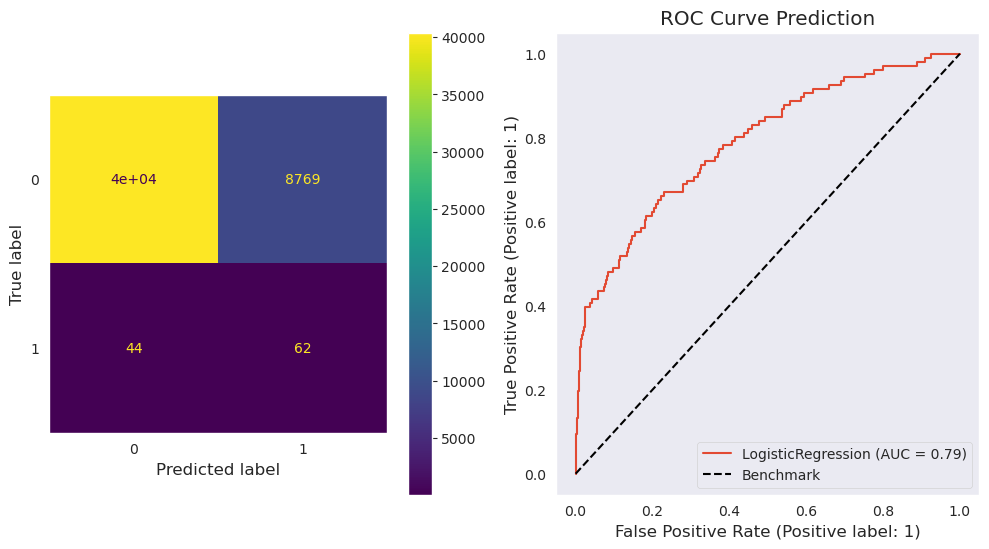

In [73]:
plot_classification_metrics(best_log_reg_v2,y_upsamp,X_upsamp)
plot_classification_metrics(best_log_reg_v2,y_test,X_test)

In [74]:
kpis_v2 = get_metrics_table(best_log_reg_v2,y_test,X_test,model_name="grid_search_logit_upsampling")
kpis_v2

,Model,Accuracy,Precision,Recall,F1-Score,Area Under the Curve,Gini
0,grid_search_logit_upsampling,0.821128,0.007021,0.584906,0.013875,0.788554,0.58


* SMOTE

In [75]:

X_train, X_test, y_train, y_test = train_test_split(X , y, train_size = SPLIT,stratify=y ,random_state = SEED)

X_train_smote, y_train_smote = SMOTE(random_state=42).fit_resample(X_train, y_train)
smote_value_counts = y_train_smote.value_counts()
print("Fraudulent transactions are %.2f%% of the test set." % (smote_value_counts[0] * 100 / len(y_train_smote)))
strat_kfold = StratifiedKFold(n_splits=10, shuffle=False)



Fraudulent transactions are 50.00% of the test set.


In [76]:

params_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
}



# Step 2: Perform cross-validation with hyperparameter tuning
grid_search_log_reg_v3 = GridSearchCV(LogisticRegression(class_weight='balanced',solver='liblinear'), params_log_reg, cv=strat_kfold, scoring='roc_auc',n_jobs=-1)
grid_search_log_reg_v3.fit(X_train_smote, y_train_smote)

best_log_reg_v3 = grid_search_log_reg_v3.best_estimator_
best_log_reg_v3.fit(X_train_smote, y_train_smote)

train_metrics_v3 = get_metrics(best_log_reg_v3,y_train_smote, X_train_smote )
test_metrics_v3 = get_metrics(best_log_reg_v3,y_test,X_test)

display_metrics(train_metrics_v3,test_metrics_v3)

Accuracy  - Train :  0.7262
Accuracy  - Test :  0.7809
----------------------------------------------------------------------------------------------------
Precision  - Train :  0.7528
Precision  - Test :  0.006
----------------------------------------------------------------------------------------------------
Recall  - Train :  0.6737
Recall  - Test :  0.6132
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  0.7111
F1-Score  - Test :  0.0119
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  0.8282
Area Under the Curve  - Test :  0.7819
----------------------------------------------------------------------------------------------------
Gini  - Train :  0.66
Gini  - Test :  0.56
----------------------------------------------------------------------------------------------------


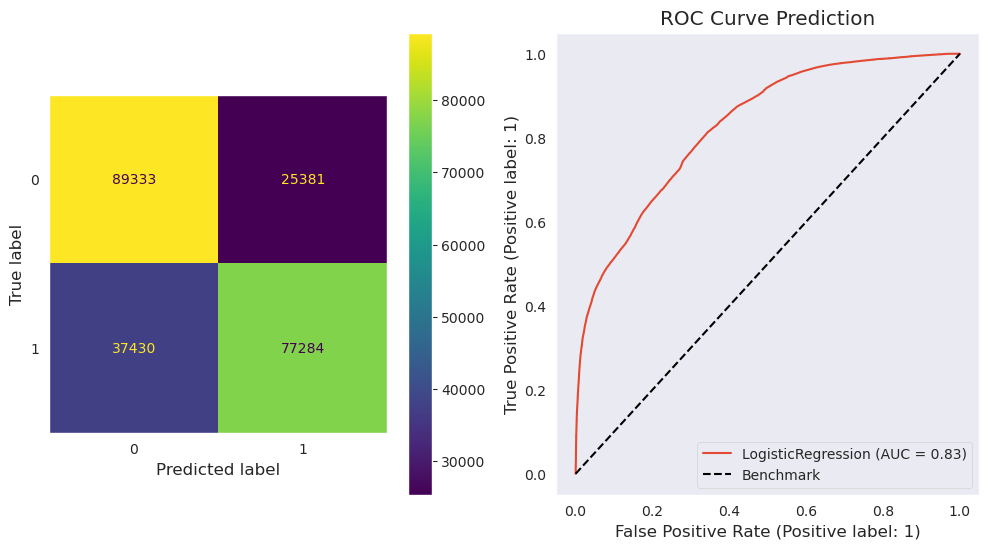

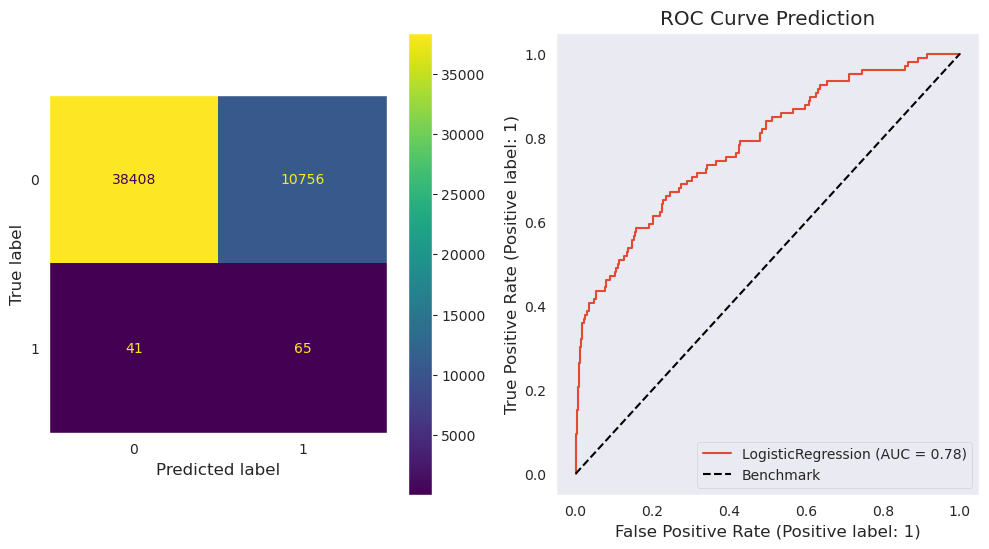

In [107]:
plot_classification_metrics(best_log_reg_v3,y_train_smote, X_train_smote )
plot_classification_metrics(best_log_reg_v3,y_test,X_test)

In [77]:
kpis_v3 = get_metrics_table(best_log_reg_v3,y_test,X_test,model_name="grid_search_logit_SMOTE")
kpis_v3

,Model,Accuracy,Precision,Recall,F1-Score,Area Under the Curve,Gini
0,grid_search_logit_SMOTE,0.780861,0.006007,0.613208,0.011897,0.781903,0.56


__________

# XGBoost



## Simple XGBoost

In [79]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=SPLIT,
                                                    stratify=y, shuffle=True,
                                                    random_state=SEED)



xgb_cl = xgb.XGBClassifier(objective = "binary:logistic", seed = SEED, scale_pos_weight = 10)
avaliacao = [(X_train, y_train), (X_test, y_test)]

xgb_cl.fit(X_train, y_train, eval_metric = ["auc"], eval_set = avaliacao, verbose = True)
resultados_mod = xgb_cl.evals_result()

# Prediçoes para o treinamento e teste

y_pred_train1 = xgb_cl.predict(X_train)
y_pred_test1 = xgb_cl.predict(X_test)

[0]	validation_0-auc:0.67396	validation_1-auc:0.55053


/home/eduardo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-auc:0.70161	validation_1-auc:0.56336
[2]	validation_0-auc:0.72196	validation_1-auc:0.65110
[3]	validation_0-auc:0.72752	validation_1-auc:0.66389
[4]	validation_0-auc:0.80217	validation_1-auc:0.68231
[5]	validation_0-auc:0.81106	validation_1-auc:0.67178
[6]	validation_0-auc:0.83767	validation_1-auc:0.68238
[7]	validation_0-auc:0.90363	validation_1-auc:0.73467
[8]	validation_0-auc:0.92127	validation_1-auc:0.76457
[9]	validation_0-auc:0.93755	validation_1-auc:0.76897
[10]	validation_0-auc:0.94682	validation_1-auc:0.76253
[11]	validation_0-auc:0.96502	validation_1-auc:0.76451
[12]	validation_0-auc:0.97726	validation_1-auc:0.76098
[13]	validation_0-auc:0.98314	validation_1-auc:0.76432
[14]	validation_0-auc:0.98914	validation_1-auc:0.76953
[15]	validation_0-auc:0.98949	validation_1-auc:0.76841
[16]	validation_0-auc:0.99233	validation_1-auc:0.76204
[17]	validation_0-auc:0.99300	validation_1-auc:0.75938
[18]	validation_0-auc:0.99448	validation_1-auc:0.75455
[19]	validation_0-a

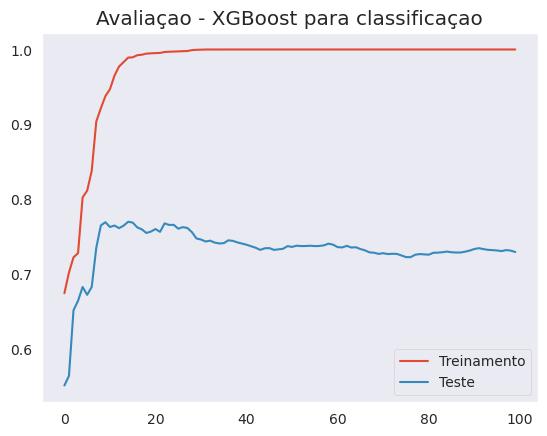

In [80]:
# Verificando o grafico de avaliaçao

x = len(resultados_mod["validation_0"]["auc"])
X_axis = range(0, x)
fig, ax = plt.subplots()
ax.plot(X_axis, resultados_mod["validation_0"]["auc"], label = "Treinamento")
ax.plot(X_axis, resultados_mod["validation_1"]["auc"], label = "Teste")
plt.title("Avaliaçao - XGBoost para classificaçao");
plt.legend(loc = "lower right");

In [81]:
train_metrics = get_metrics(xgb_cl,y_train,X_train)
test_metrics = get_metrics(xgb_cl,y_test,X_test)
display_metrics(train_metrics,test_metrics)

Accuracy  - Train :  1.0
Accuracy  - Test :  0.9977
----------------------------------------------------------------------------------------------------
Precision  - Train :  1.0
Precision  - Test :  0.0
----------------------------------------------------------------------------------------------------
Recall  - Train :  1.0
Recall  - Test :  0.0
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  1.0
F1-Score  - Test :  0.0
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  1.0
Area Under the Curve  - Test :  0.7291
----------------------------------------------------------------------------------------------------
Gini  - Train :  1.0
Gini  - Test :  0.46
----------------------------------------------------------------------------------------------------


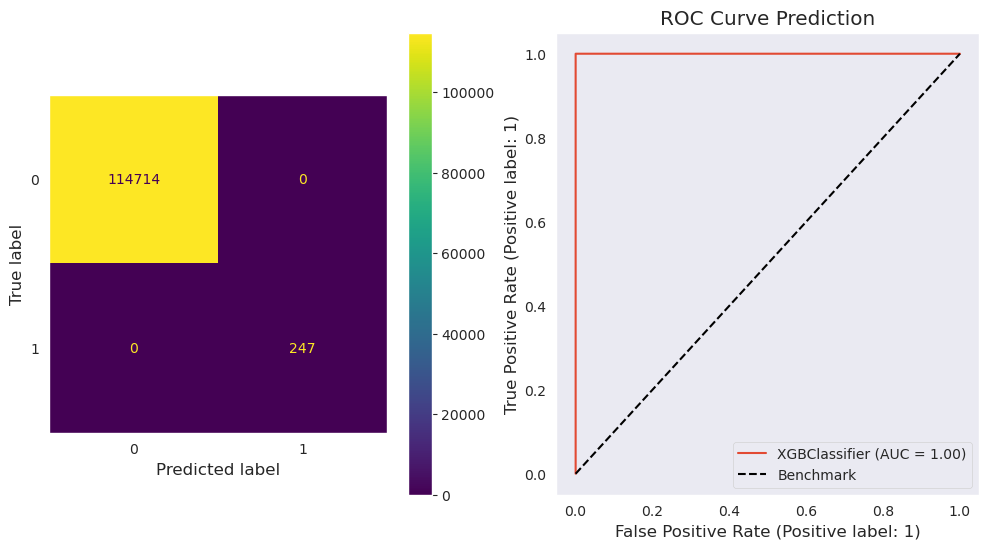

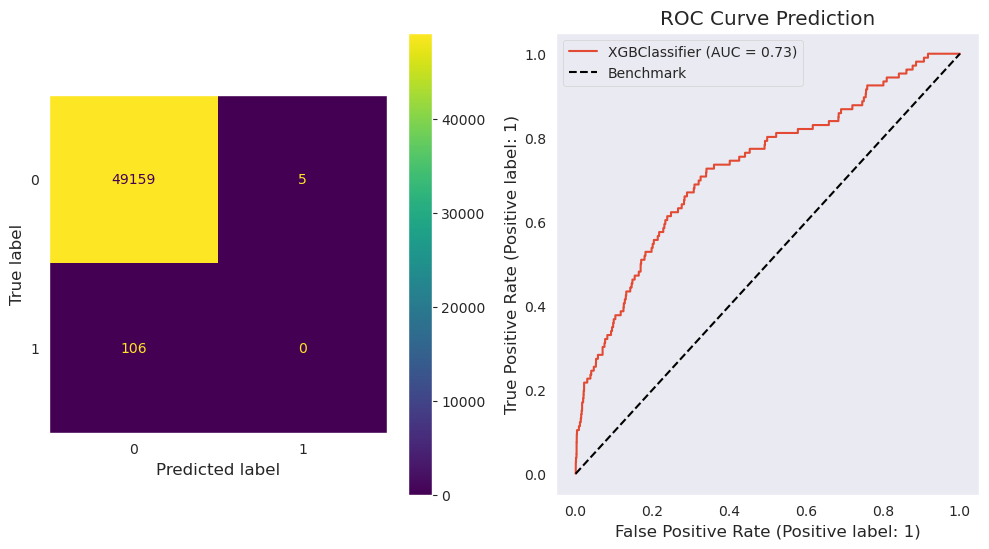

In [82]:
plot_classification_metrics(xgb_cl,y_train,X_train)
plot_classification_metrics(xgb_cl,y_test,X_test)

In [83]:
kpis_v4 = get_metrics_table(xgb_cl,y_test,X_test,model_name="xgboost_default")
kpis_v4

,Model,Accuracy,Precision,Recall,F1-Score,Area Under the Curve,Gini
0,xgboost_default,0.997747,0.0,0.0,0.0,0.729087,0.46


## Using SMOTE 

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=SPLIT,
                                                    stratify=y, shuffle=True,
                                                    random_state=SEED)

X_train_smote, y_train_smote = SMOTE(random_state=SEED).fit_resample(X_train, y_train)
smote_value_counts = y_train_smote.value_counts()
print("Fraudulent transactions are %.2f%% of the test set." % (smote_value_counts[0] * 100 / len(y_train_smote)))

Fraudulent transactions are 50.00% of the test set.


In [85]:
xgb_cl_smote = xgb.XGBClassifier(objective = "binary:logistic", n_estimators = 45, seed = 42, scale_pos_weight = 10)
avaliacao = [(X_train_smote, y_train_smote), (X_test, y_test)]

xgb_cl_smote.fit(X_train, y_train, eval_metric = ["auc"], eval_set = avaliacao, verbose = True)
resultados_mod = xgb_cl_smote.evals_result()

[0]	validation_0-auc:0.62176	validation_1-auc:0.55053


/home/eduardo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-auc:0.64975	validation_1-auc:0.56336
[2]	validation_0-auc:0.67222	validation_1-auc:0.65110
[3]	validation_0-auc:0.67089	validation_1-auc:0.66389
[4]	validation_0-auc:0.74351	validation_1-auc:0.68231
[5]	validation_0-auc:0.74540	validation_1-auc:0.67178
[6]	validation_0-auc:0.75746	validation_1-auc:0.68238
[7]	validation_0-auc:0.81740	validation_1-auc:0.73467
[8]	validation_0-auc:0.83581	validation_1-auc:0.76457
[9]	validation_0-auc:0.84756	validation_1-auc:0.76897
[10]	validation_0-auc:0.85665	validation_1-auc:0.76253
[11]	validation_0-auc:0.86614	validation_1-auc:0.76451
[12]	validation_0-auc:0.87775	validation_1-auc:0.76098
[13]	validation_0-auc:0.88361	validation_1-auc:0.76432
[14]	validation_0-auc:0.89050	validation_1-auc:0.76953
[15]	validation_0-auc:0.89457	validation_1-auc:0.76841
[16]	validation_0-auc:0.90022	validation_1-auc:0.76204
[17]	validation_0-auc:0.90280	validation_1-auc:0.75938
[18]	validation_0-auc:0.90917	validation_1-auc:0.75455
[19]	validation_0-a

In [86]:
# Prediçoes para o treinamento e teste
y_pred_train1 = xgb_cl_smote.predict(X_train)
y_pred_test1 = xgb_cl_smote.predict(X_test)

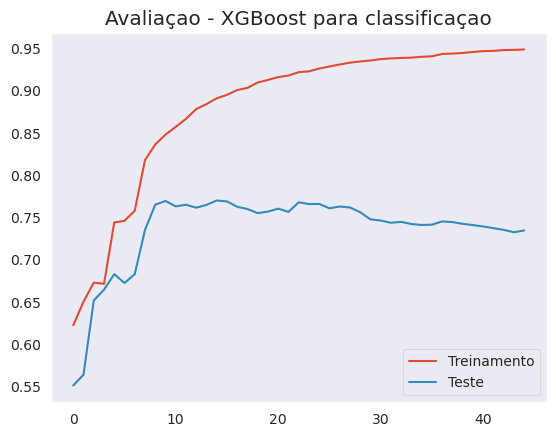

In [87]:
# Verificando o grafico de avaliaçao

x = len(resultados_mod["validation_0"]["auc"])
X_axis = range(0, x)
fig, ax = plt.subplots()
ax.plot(X_axis, resultados_mod["validation_0"]["auc"], label = "Treinamento")
ax.plot(X_axis, resultados_mod["validation_1"]["auc"], label = "Teste")
plt.title("Avaliaçao - XGBoost para classificaçao");
plt.legend(loc = "lower right");

In [88]:
train_metrics = get_metrics(xgb_cl_smote,y_train,X_train)
test_metrics = get_metrics(xgb_cl_smote,y_test,X_test)
display_metrics(train_metrics,test_metrics)

Accuracy  - Train :  1.0
Accuracy  - Test :  0.9977
----------------------------------------------------------------------------------------------------
Precision  - Train :  1.0
Precision  - Test :  0.0
----------------------------------------------------------------------------------------------------
Recall  - Train :  0.996
Recall  - Test :  0.0
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  0.998
F1-Score  - Test :  0.0
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  1.0
Area Under the Curve  - Test :  0.7341
----------------------------------------------------------------------------------------------------
Gini  - Train :  1.0
Gini  - Test :  0.47
----------------------------------------------------------------------------------------------------


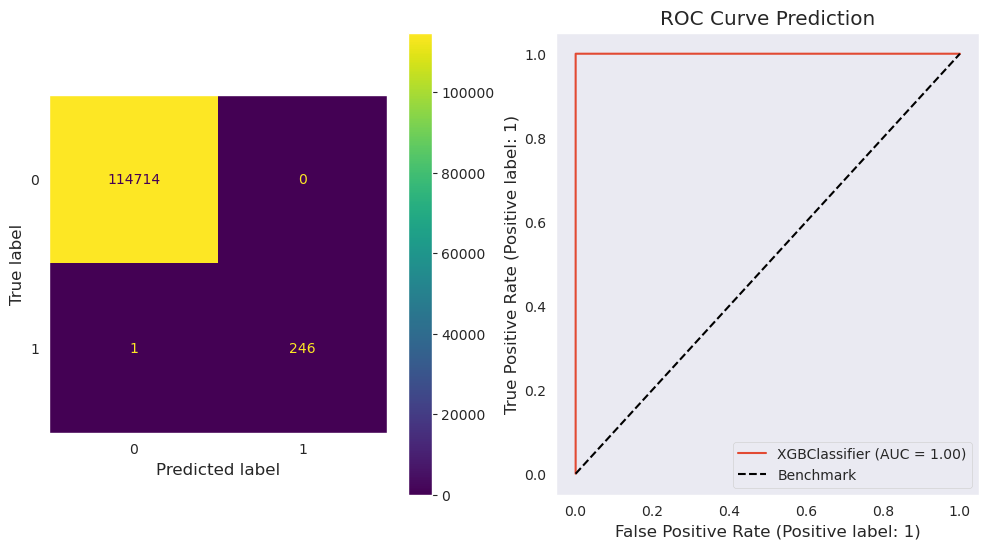

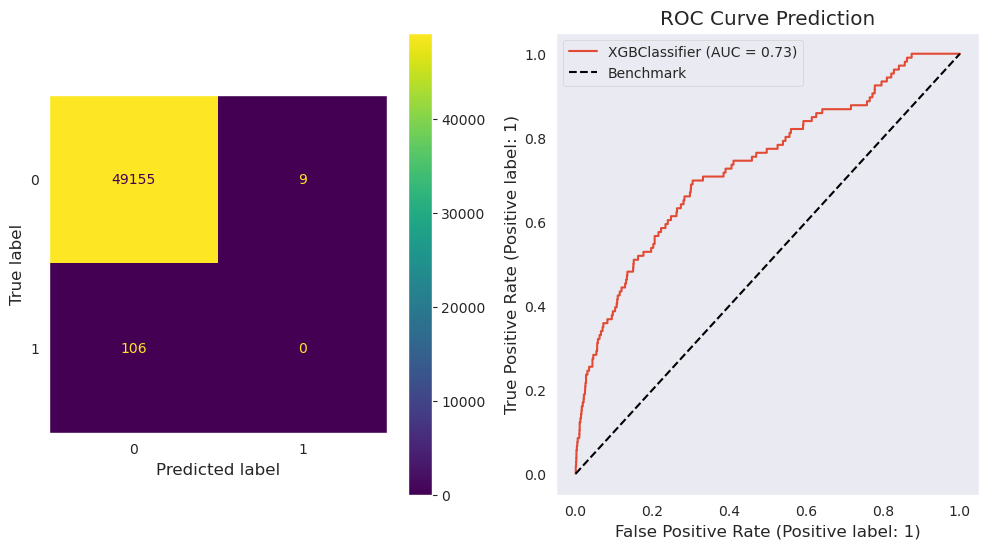

In [89]:
plot_classification_metrics(xgb_cl_smote,y_train,X_train)
plot_classification_metrics(xgb_cl_smote,y_test,X_test)

In [90]:
kpis_v5 = get_metrics_table(xgb_cl_smote,y_test,X_test,model_name="xgboost_default_smote")
kpis_v5

,Model,Accuracy,Precision,Recall,F1-Score,Area Under the Curve,Gini
0,xgboost_default_smote,0.997666,0.0,0.0,0.0,0.734055,0.47


## Ajustando os parametros

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = SPLIT , random_state =  SEED)

class_ratio = np.sum(y_train == 0) / np.sum(y_train == 1)

# Set the scale_pos_weight parameter
scale_pos_weight = class_ratio

print("Class Ratio : ",scale_pos_weight)

params_v2 = {
    'objective': 'binary:logistic',
    'gamma': 0.6,
    'learning_rate': 0.001,
    'max_depth': 3,
    'min_child_weight': 7,
    'scale_pos_weight': scale_pos_weight,
    'subsample': 0.5,
    'colsample_bytree': 0.5,
    'eval_metric': 'auc',
    'seed' : SEED
}

xgboost_v2 = xgb.XGBClassifier(**params_v2)
xgboost_v2.fit(X_train, y_train)

Class Ratio :  503.21491228070175


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.6, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [52]:
avaliacao = [(X_train, y_train), (X_test, y_test)]

xgboost_v2.fit(X_train, y_train ,eval_set = avaliacao, verbose = True)
resultados_mod = xgboost_v2.evals_result()

[0]	validation_0-auc:0.66541	validation_1-auc:0.65386
[1]	validation_0-auc:0.77046	validation_1-auc:0.70963
[2]	validation_0-auc:0.82481	validation_1-auc:0.75533
[3]	validation_0-auc:0.82608	validation_1-auc:0.76206
[4]	validation_0-auc:0.82888	validation_1-auc:0.76027
[5]	validation_0-auc:0.82968	validation_1-auc:0.75915
[6]	validation_0-auc:0.82833	validation_1-auc:0.76164
[7]	validation_0-auc:0.83711	validation_1-auc:0.76326
[8]	validation_0-auc:0.83757	validation_1-auc:0.76478
[9]	validation_0-auc:0.84257	validation_1-auc:0.76428
[10]	validation_0-auc:0.84281	validation_1-auc:0.76535
[11]	validation_0-auc:0.84572	validation_1-auc:0.76541
[12]	validation_0-auc:0.85260	validation_1-auc:0.78067
[13]	validation_0-auc:0.85513	validation_1-auc:0.77769
[14]	validation_0-auc:0.85624	validation_1-auc:0.78222
[15]	validation_0-auc:0.85609	validation_1-auc:0.78479
[16]	validation_0-auc:0.85667	validation_1-auc:0.78768
[17]	validation_0-auc:0.85750	validation_1-auc:0.78650
[18]	validation_0-au

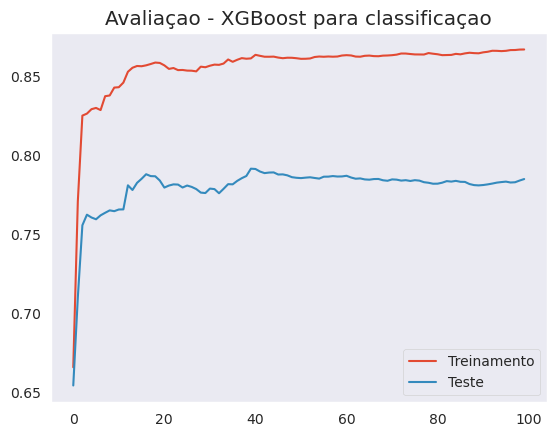

In [53]:
# Prediçoes para o treinamento e teste

y_pred_train2 = xgboost_v2.predict(X_train)
y_pred_test2 = xgboost_v2.predict(X_test)

# Verificando o grafico de avaliaçao

x = len(resultados_mod["validation_0"]["auc"])
X_axis = range(0, x)
fig, ax = plt.subplots()
ax.plot(X_axis, resultados_mod["validation_0"]["auc"], label = "Treinamento")
ax.plot(X_axis, resultados_mod["validation_1"]["auc"], label = "Teste")
plt.title("Avaliaçao - XGBoost para classificaçao");
plt.legend(loc = "lower right");

In [54]:
train_metrics = get_metrics(xgboost_v2,y_train,X_train)
test_metrics = get_metrics(xgboost_v2,y_test,X_test)
display_metrics(train_metrics,test_metrics)

Accuracy  - Train :  0.9299
Accuracy  - Test :  0.9284
----------------------------------------------------------------------------------------------------
Precision  - Train :  0.0164
Precision  - Test :  0.0148
----------------------------------------------------------------------------------------------------
Recall  - Train :  0.5833
Recall  - Test :  0.416
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  0.0319
F1-Score  - Test :  0.0287
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  0.8667
Area Under the Curve  - Test :  0.7846
----------------------------------------------------------------------------------------------------
Gini  - Train :  0.73
Gini  - Test :  0.57
----------------------------------------------------------------------------------------------------


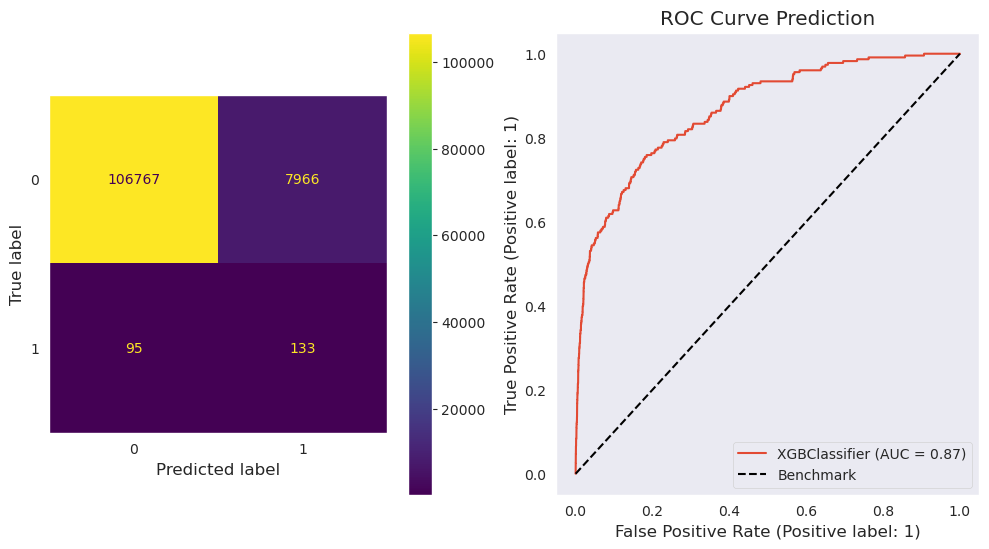

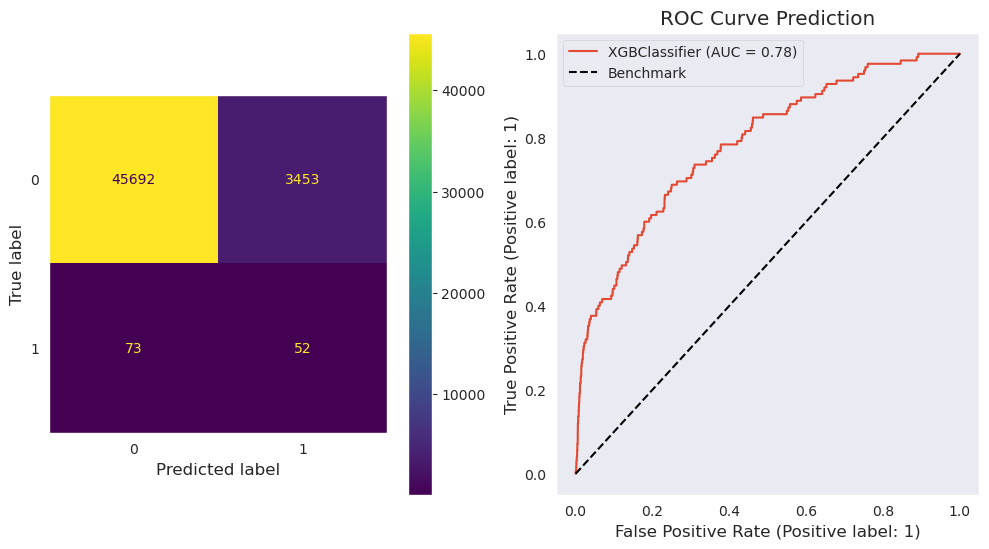

In [55]:
plot_classification_metrics(xgboost_v2,y_train,X_train)
plot_classification_metrics(xgboost_v2,y_test,X_test)

In [128]:
kpis_v6 = get_metrics_table(xgboost_v2,y_test,X_test,model_name="xgboost_adjusted")
kpis_v6

,Model,Accuracy,Precision,Recall,F1-Score,Area Under the Curve,Gini
0,xgboost_adjusted,0.929754,0.015313,0.5,0.029717,0.833445,0.67


## Ajustando parâmetros com SMOTE

In [99]:
X_train_smote, y_train_smote = SMOTE(random_state=SEED).fit_resample(X_train, y_train)
smote_value_counts = y_train_smote.value_counts()
print("Fraudulent transactions are %.2f%% of the test set." % (smote_value_counts[0] * 100 / len(y_train_smote)))

Fraudulent transactions are 50.00% of the test set.


In [100]:
class_ratio = np.sum(y_train_smote == 0) / np.sum(y_train_smote == 1)

# Set the scale_pos_weight parameter
scale_pos_weight = class_ratio


print("Class Ratio : ", scale_pos_weight)


params_v3 = {
    'objective': 'binary:logistic',
    'gamma': 0,
    'learning_rate': 0.5,
    'max_depth': 7,
    'min_child_weight': 3,
    'scale_pos_weight': scale_pos_weight,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'auc',
    'seed':42
}

xgboost_smote = xgb.XGBClassifier(**params_v3)
xgboost_smote.fit(X_train_smote, y_train_smote)

avaliacao = [(X_train_smote, y_train_smote), (X_test, y_test)]

xgboost_smote.fit(X_train_smote, y_train_smote ,eval_set = avaliacao, verbose = True)
resultados_mod = xgboost_smote.evals_result()

Class Ratio :  1.0
[0]	validation_0-auc:0.87211	validation_1-auc:0.65643
[1]	validation_0-auc:0.93310	validation_1-auc:0.67040
[2]	validation_0-auc:0.94661	validation_1-auc:0.69347
[3]	validation_0-auc:0.95737	validation_1-auc:0.71908
[4]	validation_0-auc:0.96595	validation_1-auc:0.71681
[5]	validation_0-auc:0.97344	validation_1-auc:0.72313
[6]	validation_0-auc:0.97878	validation_1-auc:0.70515
[7]	validation_0-auc:0.98226	validation_1-auc:0.71781
[8]	validation_0-auc:0.98400	validation_1-auc:0.72184
[9]	validation_0-auc:0.98540	validation_1-auc:0.70962
[10]	validation_0-auc:0.98784	validation_1-auc:0.70106
[11]	validation_0-auc:0.98876	validation_1-auc:0.69002
[12]	validation_0-auc:0.98941	validation_1-auc:0.68685
[13]	validation_0-auc:0.99012	validation_1-auc:0.68370
[14]	validation_0-auc:0.99168	validation_1-auc:0.68559
[15]	validation_0-auc:0.99268	validation_1-auc:0.68102
[16]	validation_0-auc:0.99411	validation_1-auc:0.67010
[17]	validation_0-auc:0.99488	validation_1-auc:0.66976
[

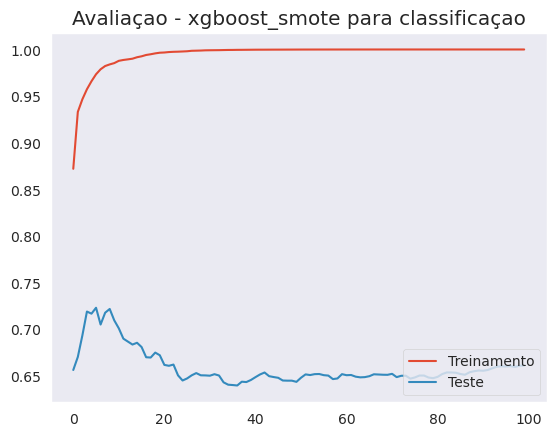

In [101]:
# Prediçoes para o treinamento e teste

y_pred_train3 = xgboost_smote.predict(X_train_smote)
y_pred_test3 = xgboost_smote.predict(X_test)

# Verificando o grafico de avaliaçao

x = len(resultados_mod["validation_0"]["auc"])
X_axis = range(0, x)
fig, ax = plt.subplots()
ax.plot(X_axis, resultados_mod["validation_0"]["auc"], label = "Treinamento")
ax.plot(X_axis, resultados_mod["validation_1"]["auc"], label = "Teste")
plt.title("Avaliaçao - xgboost_smote para classificaçao");
plt.legend(loc = "lower right");

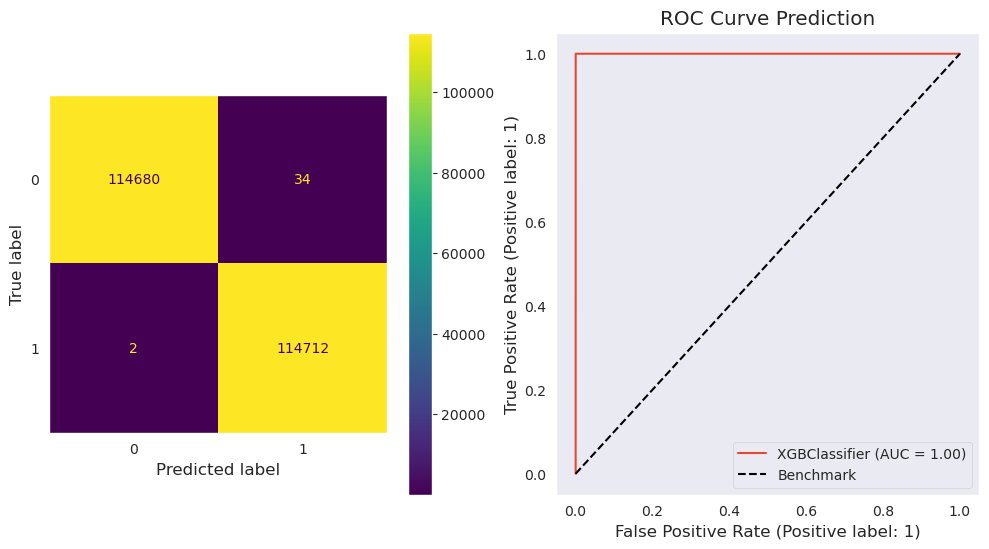

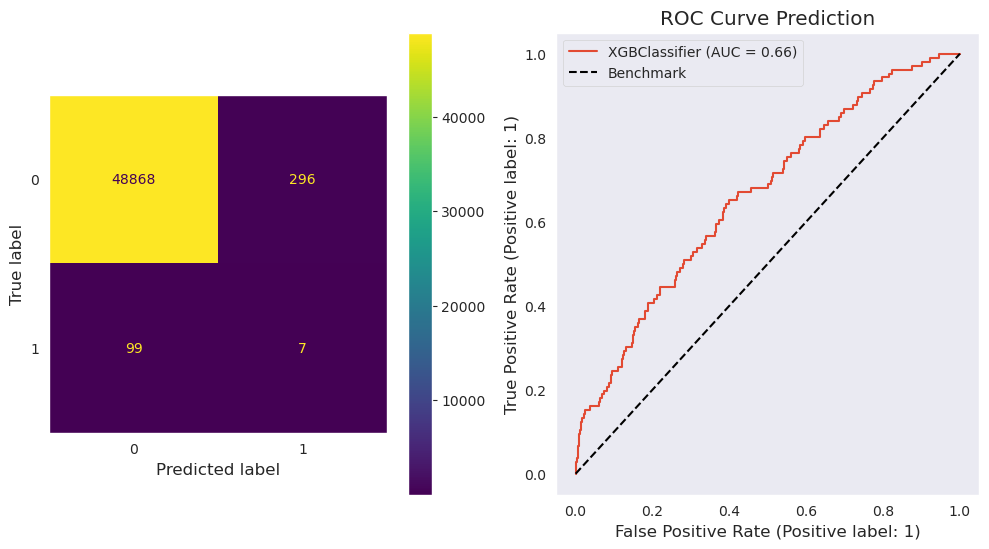

In [103]:
plot_classification_metrics(xgboost_smote,y_train_smote,X_train_smote)
plot_classification_metrics(xgboost_smote,y_test,X_test)

In [129]:
kpis_v7 = get_metrics_table(xgboost_smote,y_test,X_test,model_name="xgboost_adjusted_smote")
kpis_v7

,Model,Accuracy,Precision,Recall,F1-Score,Area Under the Curve,Gini
0,xgboost_adjusted_smote,0.991983,0.023102,0.066038,0.03423,0.661177,0.32


---------

# Validação

In [130]:
all_kpis = pd.concat([kpis_v1,kpis_v2,kpis_v3,kpis_v4,kpis_v5,kpis_v6,kpis_v7]).sort_values("Area Under the Curve",ascending=False)
all_kpis['Model'] = all_kpis['Model'].str.upper()
all_kpis.reset_index(drop=True,inplace=True)
all_kpis.to_excel("kpis_models.xlsx")
all_kpis

,Model,Accuracy,Precision,Recall,F1-Score,Area Under the Curve,Gini
0,XGBOOST_ADJUSTED,0.929754,0.015313,0.500000,0.029717,0.833445,0.67
1,GRID_SEARCH_LOGIT,0.820418,0.008895,0.632000,0.017544,0.809597,0.62
2,GRID_SEARCH_LOGIT_UPSAMPLING,0.821128,0.007021,0.584906,0.013875,0.788554,0.58
3,GRID_SEARCH_LOGIT_SMOTE,0.780861,0.006007,0.613208,0.011897,0.781903,0.56
4,XGBOOST_DEFAULT_SMOTE,0.997666,0.000000,0.000000,0.000000,0.734055,0.47
5,XGBOOST_DEFAULT,0.997747,0.000000,0.000000,0.000000,0.729087,0.46
6,XGBOOST_ADJUSTED_SMOTE,0.991983,0.023102,0.066038,0.034230,0.661177,0.32


In [114]:
X_validation = pd.read_excel("teste.xlsx").set_index("id")
X_validation

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
id,,,,,,,,,,,,,,,,,,,,,
1,1.037165,-0.064713,-0.568709,0.206423,-0.096319,-0.605072,0.055348,-0.131739,0.371072,0.054391,...,-0.117455,-0.549680,0.251234,0.084659,0.032844,-0.153479,-0.161900,0.051674,-0.146485,-0.167351
2,0.999413,-0.625445,-0.260484,-0.447270,-0.561264,-0.135433,-0.514644,0.025099,-0.054974,0.454387,...,-0.028290,-0.060495,-0.072014,-0.019791,0.826528,-0.126800,-0.407177,0.358392,0.032858,0.027424
3,0.045767,0.502259,-0.111723,-0.217624,0.333774,-0.494176,0.474073,-0.042395,-0.021013,-0.409191,...,-0.113273,-0.276434,-0.443233,-0.090445,0.115143,0.295289,-0.160795,-0.216980,-0.010688,-0.163363
4,0.989824,-0.092475,-0.532103,0.060062,-0.107619,-0.324415,-0.043913,-0.017683,0.442919,-0.003764,...,0.338480,-0.752412,0.277020,-0.412178,-0.263633,-0.047919,-0.156259,0.321330,-0.170045,-0.047757
5,0.512949,-0.085913,0.601859,0.621950,-0.318286,0.549537,-0.469326,0.284619,0.346332,-0.048747,...,0.695699,-0.064083,-0.040918,0.050274,-0.169468,0.045432,-0.211822,-0.365970,-0.101814,0.049579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54894,-0.284020,0.358543,0.816736,0.343417,0.321489,-0.557867,0.184523,-0.078538,-0.386856,-0.178407,...,0.146972,0.412179,-0.070294,0.697965,0.033622,0.116540,-0.045713,0.413006,0.097687,-0.049339
54895,0.612896,-0.242468,0.182951,-0.524729,-0.366483,-0.040439,-0.320372,0.113319,0.783348,-0.401544,...,0.283895,-0.584995,0.263584,0.422738,0.079915,-0.323800,0.438058,0.239289,-0.067957,-0.038325
54896,-2.695072,1.641524,-1.549643,2.817192,-0.821163,-0.406851,-2.368896,-5.367777,-1.548769,-3.542884,...,-3.468386,-0.524467,-4.209872,0.414294,-3.293217,-5.369892,-2.386274,-0.034517,0.527214,-0.439787


In [117]:
y_validation_pred = xgboost_v2.predict(X_validation.values)

In [125]:
validation_dataframe = X_validation.copy()
validation_dataframe['Class'] = y_validation_pred

In [126]:
validation_dataframe['Class'].value_counts()

0    52649
1     2249
Name: Class, dtype: int64

In [127]:
validation_dataframe.reset_index()[['id','Class']].to_excel("Entrega.xlsx",index=False)